# Subsetter - Repositories Metrics Analysis

This jupyter notebook contains repositores metrics dataset analysis, including descriptive analysis, correlation analysis.

It also contains first iteration of minimal subset analysis, but it is by no means final version of it.

Script was run in [google colab](https://colab.google/). Local reproduction tutorial will appear during next project stage.

## Setup

In [1]:
!pip install ydata-profiling
!pip install typing-extensions --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6bd6d68245e288479eb597a05f2aa29b88d4745c9f5b33ed7733cdf7a863e000
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd

## Read data

In [5]:
path = 'metrics.json' # change if needed, for repository - 'data/metrics.json'
# load file
with open(path) as f:
    d = json.load(f)
# transfer to convenient structure
for x in d:
  x['url'] = x['meta']['url']
  for metric, value in x['metrics'].items():
    x[metric] = value
  # erase string metadata
  del x['meta']
  del x['metrics']

In [6]:
df = pd.DataFrame.from_dict(d)
df

,url,complexity.closure.avg,complexity.closure.mode,complexity.closure.sum,complexity.impl_item_fn.avg,complexity.impl_item_fn.mode,complexity.impl_item_fn.sum,complexity.item_fn.avg,complexity.item_fn.mode,complexity.item_fn.sum,...,trait_def.assoc_type_count.sum,trait_def.default_fn_count.avg,trait_def.default_fn_count.mode,trait_def.default_fn_count.sum,trait_def.generic_param_count.avg,trait_def.generic_param_count.mode,trait_def.generic_param_count.sum,trait_def.supertrait_count.avg,trait_def.supertrait_count.mode,trait_def.supertrait_count.sum
0,git@github.com:rust-lang/rust.git,0.856376,0.0,24393,1.957386,0.0,92234,209.050483,0.0,13640544,...,2510,0.331954,0.0,2727,0.309799,0.0,2545,0.202069,0.0,1660
1,git@github.com:BurntSushi/ripgrep.git,0.484321,0.0,139,1.682715,0.0,2132,0.839204,0.0,548,...,3,5.333333,2.0,32,0.166667,0.0,1,0.333333,0.0,2
2,git@github.com:nushell/nushell.git,0.882254,0.0,2098,1.854846,0.0,8766,3.070834,0.0,15130,...,1,0.812500,0.0,26,0.031250,0.0,1,0.593750,0.0,19
3,git@github.com:influxdata/influxdb.git,0.528027,0.0,1705,1.054334,0.0,5996,0.885300,0.0,4276,...,52,1.020942,0.0,195,0.062827,0.0,12,1.958115,0.0,374
4,git@github.com:surrealdb/surrealdb.git,0.250965,0.0,195,2.108046,0.0,6419,0.821994,0.0,2646,...,16,0.571429,0.0,48,0.380952,0.0,32,0.178571,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,git@github.com:wormtql/yas.git,4.000000,0.0,124,4.648352,0.0,423,3.857143,0.0,162,...,0,0.000000,0.0,0,0.000000,0.0,0,0.000000,0.0,0
361,git@github.com:orium/rpds.git,1.931741,2.0,566,1.016129,0.0,378,1.284264,0.0,506,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
362,git@github.com:bytecodealliance/rustix.git,0.153509,0.0,70,0.325991,0.0,222,0.708720,0.0,1528,...,1,0.000000,0.0,0,0.000000,0.0,0,0.190476,0.0,4
363,git@github.com:BrainiumLLC/cargo-mobile.git,0.249284,0.0,87,0.924658,0.0,405,3.018405,0.0,492,...,1,1.500000,0.0,6,0.250000,0.0,1,1.500000,2.0,6


## Description of features in the dataset
Features in the dataset - detailed description can be obtained in the Overleaf report.

List of columns:

In [7]:
print(f'Number of Columns in the dataset: {df.columns.shape[0]}')
list(df.columns)

Number of Columns in the dataset: 149


['url',
 'complexity.closure.avg',
 'complexity.closure.mode',
 'complexity.closure.sum',
 'complexity.impl_item_fn.avg',
 'complexity.impl_item_fn.mode',
 'complexity.impl_item_fn.sum',
 'complexity.item_fn.avg',
 'complexity.item_fn.mode',
 'complexity.item_fn.sum',
 'enums.attr_count.avg',
 'enums.attr_count.mode',
 'enums.attr_count.sum',
 'enums.variant_attr_count.avg',
 'enums.variant_attr_count.mode',
 'enums.variant_attr_count.sum',
 'enums.variant_count.avg',
 'enums.variant_count.mode',
 'enums.variant_count.sum',
 'fn_depth.avg',
 'fn_depth.mode',
 'fn_depth.sum',
 'if_count',
 'lcom4_per_impl_block.avg',
 'lcom4_per_impl_block.mode',
 'lcom4_per_impl_block.sum',
 'macro.argument_size.avg',
 'macro.argument_size.mode',
 'macro.argument_size.sum',
 'macro.count_per_file.avg',
 'macro.count_per_file.mode',
 'macro.count_per_file.sum',
 'per_file.enum_count.avg',
 'per_file.enum_count.mode',
 'per_file.enum_count.sum',
 'per_file.impl_block_count.avg',
 'per_file.impl_block_cou

As can be seen from above, metrics collected are about classes and methods in the repositories, as well as repo-wide metrics like # of starts, forks, etc.

## Basic Descriptive statistics about repositories features

In [44]:
df.describe()

,complexity.closure.avg,complexity.closure.mode,complexity.closure.sum,complexity.impl_item_fn.avg,complexity.impl_item_fn.mode,complexity.impl_item_fn.sum,complexity.item_fn.avg,complexity.item_fn.mode,complexity.item_fn.sum,enums.attr_count.avg,...,trait_def.assoc_type_count.sum,trait_def.default_fn_count.avg,trait_def.default_fn_count.mode,trait_def.default_fn_count.sum,trait_def.generic_param_count.avg,trait_def.generic_param_count.mode,trait_def.generic_param_count.sum,trait_def.supertrait_count.avg,trait_def.supertrait_count.mode,trait_def.supertrait_count.sum
count,363.000000,363.000000,365.000000,363.000000,363.000000,365.000000,364.000000,364.000000,3.650000e+02,357.000000,...,365.000000,336.000000,336.000000,365.000000,336.000000,336.000000,365.000000,336.000000,336.000000,365.000000
mean,0.723377,0.016529,456.090411,1.811740,0.008264,2290.515068,3.314219,0.046703,3.883534e+04,2.122881,...,15.090411,1.231016,0.440476,54.490411,0.271440,0.145833,16.402740,0.717143,0.380952,62.178082
std,0.853883,0.181315,1747.453375,1.764532,0.090658,6566.842088,13.488160,0.530622,7.139155e+05,1.894808,...,131.948125,3.003698,3.423714,355.552616,0.381146,0.488232,134.439902,0.674176,0.879685,555.084716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028347,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279742,0.000000,37.000000,0.828697,0.000000,249.000000,0.849038,0.000000,1.830000e+02,1.166667,...,0.000000,0.086039,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,1.000000
50%,0.500000,0.000000,113.000000,1.322239,0.000000,755.000000,1.525070,0.000000,5.060000e+02,1.726225,...,2.000000,0.460307,0.000000,7.000000,0.154243,0.000000,2.000000,0.574176,0.000000,6.000000
75%,0.829743,0.000000,330.000000,2.173703,0.000000,2092.000000,2.849278,0.000000,1.177000e+03,2.456897,...,8.000000,1.212500,0.000000,28.000000,0.396053,0.000000,8.000000,1.000000,0.000000,23.000000
max,6.594286,2.000000,24393.000000,19.065789,1.000000,92234.000000,209.050483,8.000000,1.364054e+07,25.222222,...,2510.000000,34.600000,45.000000,6139.000000,4.000000,4.000000,2545.000000,3.500000,6.000000,10289.000000


We have 363 repositories for analysis in total, for 149 metrics.

Metrics have different scale as their nature varies, raning from min-max from 0 to 7 up to $10^4$ to $10^7$.

The report above also contains quartiles for the data, which can help in further analysis, for example, for outliers filtering.

## Null values in the dataset

In [8]:
NA_columnwise = df.isna().sum(axis=0)
NA_columnwise

url                                    0
complexity.closure.avg                 2
complexity.closure.mode                2
complexity.closure.sum                 0
complexity.impl_item_fn.avg            2
                                      ..
trait_def.generic_param_count.mode    29
trait_def.generic_param_count.sum      0
trait_def.supertrait_count.avg        29
trait_def.supertrait_count.mode       29
trait_def.supertrait_count.sum         0
Length: 149, dtype: int64

In [13]:
NA_columnwise.describe(percentiles=[.25, .5, .75, .9, .95, .99])

count    149.000000
mean       2.442953
std        7.325799
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
90%        8.000000
95%       29.000000
99%       29.000000
max       29.000000
dtype: float64

We can see that for over 75% of the data, columns contain no None/NA values, which indicate high quality of the dataset collected.

Maximum amount of missing values is 29, and 0.9 percentile is 8 (missing values from 149 metrics in total).

Total number and ratio of null/NA values:

In [16]:
na_count =  df.isna().sum().sum()
total_count = df.shape[0] * df.shape[1]

print('Total NA count:', na_count)
print('Total ratio of NA/null to the whole dataset', (na_count/total_count)*100, '%')

Total NA count: 364
Total ratio of NA/null to the whole dataset 0.6693021972970489 %


Less than 1% of missing data again justifies quality of collected dataset

Let's see which columns or repositories have null/NA values

In [18]:
NA_columnwise[NA_columnwise > 1]

complexity.closure.avg                 2
complexity.closure.mode                2
complexity.impl_item_fn.avg            2
complexity.impl_item_fn.mode           2
enums.attr_count.avg                   8
enums.attr_count.mode                  8
enums.variant_attr_count.avg           8
enums.variant_attr_count.mode          8
enums.variant_count.avg                8
enums.variant_count.mode               8
lcom4_per_impl_block.avg               2
lcom4_per_impl_block.mode              2
trait_def.all_fn_count.avg            29
trait_def.all_fn_count.mode           29
trait_def.assoc_type_count.avg        29
trait_def.assoc_type_count.mode       29
trait_def.default_fn_count.avg        29
trait_def.default_fn_count.mode       29
trait_def.generic_param_count.avg     29
trait_def.generic_param_count.mode    29
trait_def.supertrait_count.avg        29
trait_def.supertrait_count.mode       29
dtype: int64

Some specific feature type 'trait_def' has most missing values. It is due to the fact that this traits definition construct is rather rare and may not be used in the source code at all. This is expected result for these features.

Rows in the dataset with NA's

In [24]:
NA_rowwise = df.isna().sum(axis=1)
NA_rowwise[NA_rowwise > 0].count()

35

We have 35 repositories with at least one NA value for some metric, from total of 365 repositories

## Correlation analysis

<ipython-input-26-57e071ab748f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)


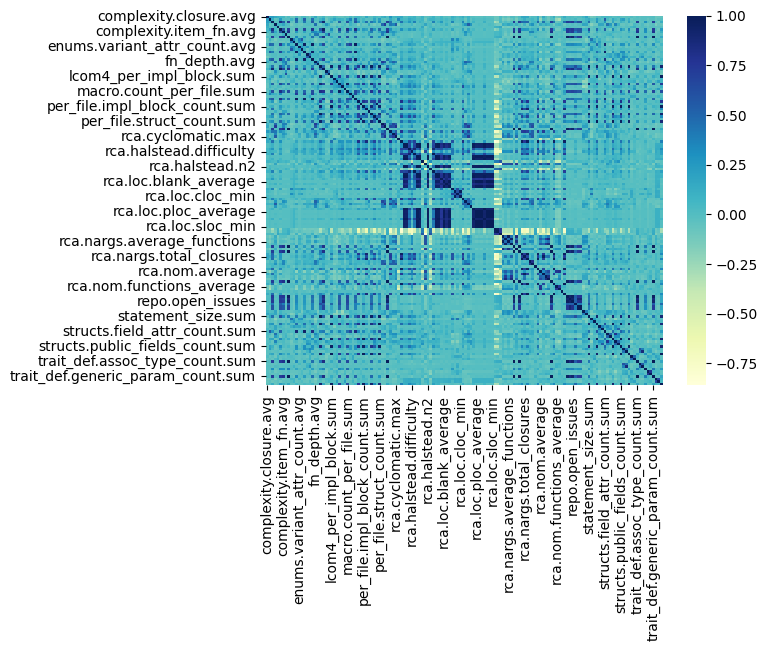

In [26]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

From visual inspection of correlation matrix, which is indeed large as we have 149 features, we can observe the following:

- There are groups of features that are nearly with correlation 1.0, these features are typically of the same type but 'mode' and 'avg'. This is useful observation and yields that we should drop one of these features for minimal subset construction.

- Some features have negative correlation of -0.75 and less, typically these features are opposite in meaning: min and max. This is also logical behaviour and useful for analysis.

- Most of features, marked with 'sea green' colour on the plot, have very low correlation around 0. This suggests that these features may not be dependent and will be present in the final feature set together.

## Dataset preparation

based on previous analysis, let's drop rows with at least one NA/null

In [27]:
df = df.drop(index=df[df.isna().sum(axis=1) > 0].index)
df

,url,complexity.closure.avg,complexity.closure.mode,complexity.closure.sum,complexity.impl_item_fn.avg,complexity.impl_item_fn.mode,complexity.impl_item_fn.sum,complexity.item_fn.avg,complexity.item_fn.mode,complexity.item_fn.sum,...,trait_def.assoc_type_count.sum,trait_def.default_fn_count.avg,trait_def.default_fn_count.mode,trait_def.default_fn_count.sum,trait_def.generic_param_count.avg,trait_def.generic_param_count.mode,trait_def.generic_param_count.sum,trait_def.supertrait_count.avg,trait_def.supertrait_count.mode,trait_def.supertrait_count.sum
0,git@github.com:rust-lang/rust.git,0.856376,0.0,24393,1.957386,0.0,92234,209.050483,0.0,13640544,...,2510,0.331954,0.0,2727,0.309799,0.0,2545,0.202069,0.0,1660
1,git@github.com:BurntSushi/ripgrep.git,0.484321,0.0,139,1.682715,0.0,2132,0.839204,0.0,548,...,3,5.333333,2.0,32,0.166667,0.0,1,0.333333,0.0,2
2,git@github.com:nushell/nushell.git,0.882254,0.0,2098,1.854846,0.0,8766,3.070834,0.0,15130,...,1,0.812500,0.0,26,0.031250,0.0,1,0.593750,0.0,19
3,git@github.com:influxdata/influxdb.git,0.528027,0.0,1705,1.054334,0.0,5996,0.885300,0.0,4276,...,52,1.020942,0.0,195,0.062827,0.0,12,1.958115,0.0,374
4,git@github.com:surrealdb/surrealdb.git,0.250965,0.0,195,2.108046,0.0,6419,0.821994,0.0,2646,...,16,0.571429,0.0,48,0.380952,0.0,32,0.178571,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,git@github.com:console-rs/dialoguer.git,0.654545,0.0,36,4.364162,0.0,755,1.884615,0.0,49,...,2,3.800000,0.0,19,0.400000,0.0,2,0.000000,0.0,0
359,git@github.com:BurntSushi/walkdir.git,0.050000,0.0,2,1.306818,0.0,115,0.666667,0.0,44,...,0,0.000000,0.0,0,0.000000,0.0,0,0.000000,0.0,0
360,git@github.com:wormtql/yas.git,4.000000,0.0,124,4.648352,0.0,423,3.857143,0.0,162,...,0,0.000000,0.0,0,0.000000,0.0,0,0.000000,0.0,0
362,git@github.com:bytecodealliance/rustix.git,0.153509,0.0,70,0.325991,0.0,222,0.708720,0.0,1528,...,1,0.000000,0.0,0,0.000000,0.0,0,0.190476,0.0,4


## Dimensionality reduction

This part is related to the main task of the project and is still in progress

### PCA

Goal of PCA is to select components that contain the most variance. By choosing number of projected components, we can control how much variance from initial data we can recover

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_components = 11

X = df.copy().drop(columns=['url'])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to visualize the explained variance of each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio, 'Cumulative Variance Ratio': explained_variance_ratio.cumsum()})

# Display the explained variance
print(explained_variance)

    Explained Variance Ratio  Cumulative Variance Ratio
0                   0.234806                   0.234806
1                   0.127890                   0.362696
2                   0.077864                   0.440560
3                   0.051023                   0.491582
4                   0.049348                   0.540930
5                   0.038842                   0.579772
6                   0.036268                   0.616040
7                   0.028305                   0.644346
8                   0.027420                   0.671766
9                   0.023422                   0.695187
10                  0.022950                   0.718137


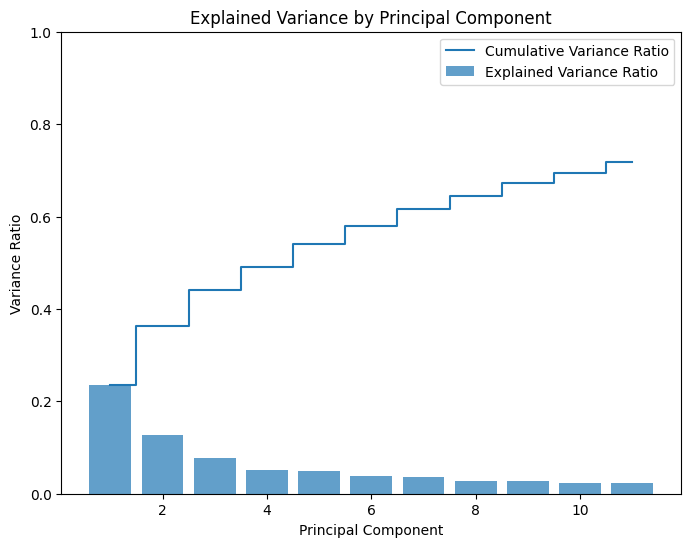

In [ ]:
# Visualize the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio', alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance['Cumulative Variance Ratio'], where='mid', label='Cumulative Variance Ratio')
plt.xlabel('Principal Component')
plt.ylim((0, 1))
plt.ylabel('Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.show()

Visualization of dataset for low-dimensional space

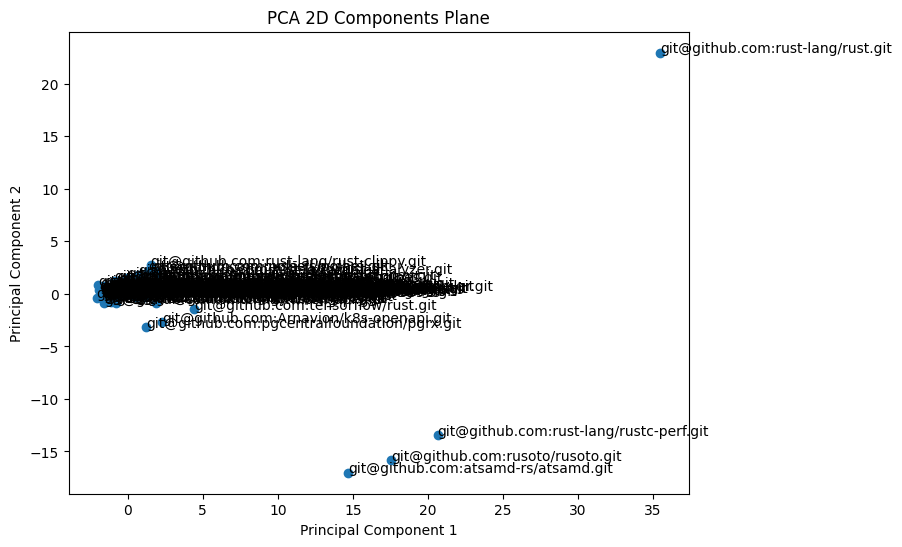

In [ ]:
pca_components = 2

X = df.copy().drop(columns=['url'])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
pca.fit(X_scaled)

# Transform the data into the PCA space
X_pca = pca.transform(X_scaled)

# Visualize the data in the 2D PCA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Components Plane')
for i, label in enumerate(df['url']):
    plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]))
plt.show()

Some outliers are detected


Let's drop components that are outliers and try again

In [ ]:
outliers = [
    "git@github.com:rust-lang/rustc-perf.git",
    "git@github.com:rusoto/rusoto.git",
    "git@github.com:atsamd-rs/atsamd.git",
    "git@github.com:rust-lang/rust.git",
    # now 2nd iteration outliers
    "git@github.com:Arnavion/k8s-openapi.git",
    "git@github.com:tensorflow/rust.git",
    "git@github.com:pgcentralfoundation/pgrx.git",
] # determined from above pca 2d plot


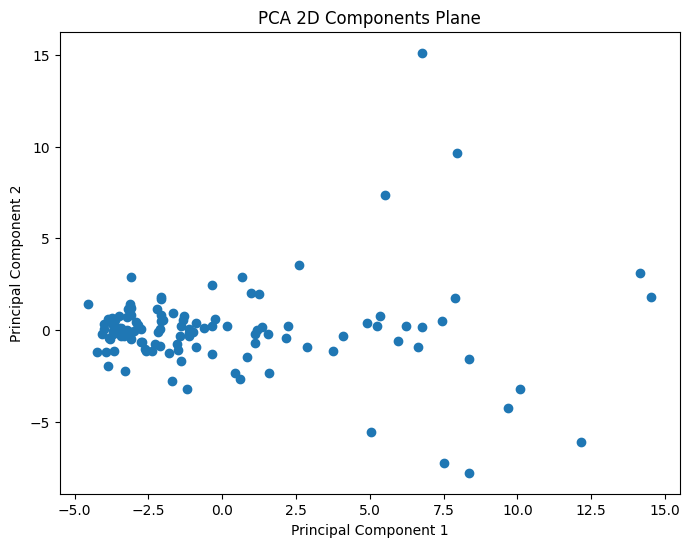

In [ ]:
pca_components = 2

df1 = df.copy()
df2 = df1[~df1['url'].isin(outliers)]
X = df2.drop(columns=['url'])


# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
# Replace 'n_components' with the number of components you want to keep
pca = PCA(n_components=pca_components)  # You can specify the number of components you want

# Fit the PCA model to the standardized data
pca.fit(X_scaled)

# Transform the data into the PCA space
X_pca = pca.transform(X_scaled)

# Visualize the data in the 2D PCA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Components Plane')
plt.show()

### PCA Features contribution

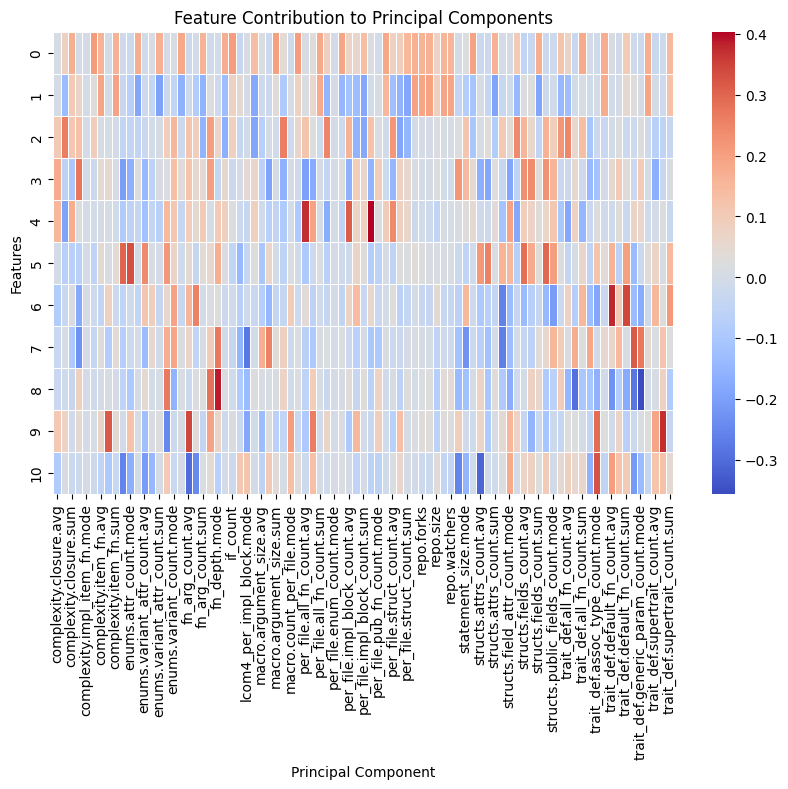

In [ ]:
# Access the loadings (weights) of features for each principal component
loadings = pca.components_

# Create a DataFrame to visualize feature contributions to each PC
loadings_df = pd.DataFrame(loadings, columns=X.columns)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Features')
plt.title('Feature Contribution to Principal Components')
plt.show()

### ICA

here ICA assumes features are independent, but this is not the case anyway.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


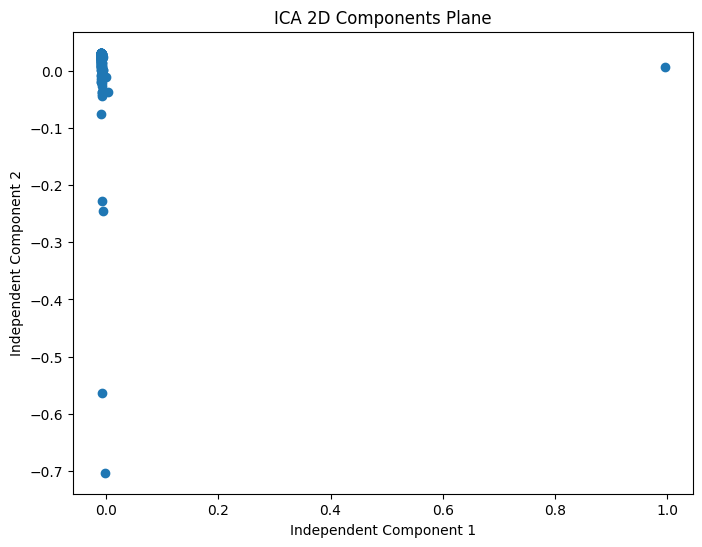

In [ ]:
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

X = df.copy().drop(columns=['url'])

# Create an ICA instance with the desired number of components
ica = FastICA(n_components=2)  # You can specify the number of components you want

# Fit the ICA model to the data
X_ica = ica.fit_transform(X)

# Visualize the data in the 2D ICA components plane
plt.figure(figsize=(8, 6))
plt.scatter(X_ica[:, 0], X_ica[:, 1])
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('ICA 2D Components Plane')
plt.show()


Similar result to PCA, but in different projection.

### t-SNE
t-Distributed Stochastic Neighbor Embedding

In [ ]:
from sklearn.manifold import TSNE

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)

X = df.copy().drop(columns=['url'])

# Fit and transform your high-dimensional data
X_tsne = tsne.fit_transform(X)

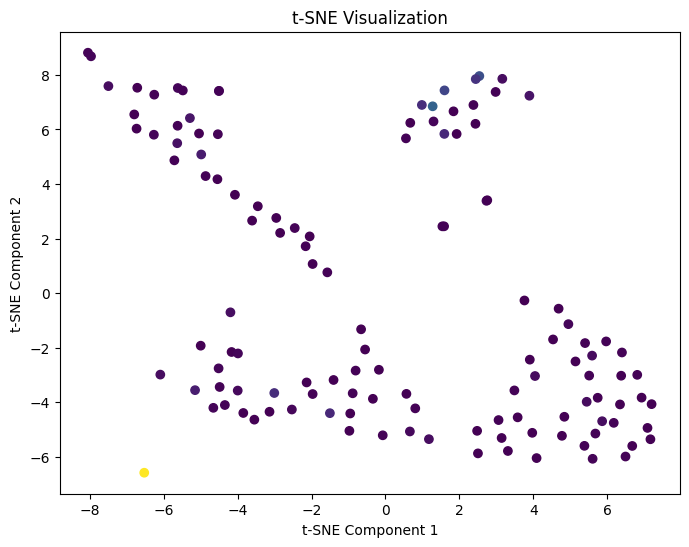

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the t-SNE results (2D representation)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

Looks cool and promising

### LDA
supervised, so we need Y

repo.start will be our Y

### Lasso and learning-based methods

Idea is to 'predict' popularity of repository from our dataset. Hence, we would be able to select features and use supervised methods for this purpose.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X = df.copy().drop(columns=[
    'url', 'repo.commit_count', 'repo.forks',
'repo.open_issues',
'repo.size',
'repo.stars',
'repo.watchers',
])
y = df.copy()['repo.stars']

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a LassoCV model with a range of alphas and cross-validation
lasso_cv = LassoCV(max_iter=5000,
    alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)  # Specify a list of alphas and the number of cross-validation folds

# Fit the LassoCV model to the training data
lasso_cv.fit(X_train, y_train)

# Get the selected features (non-zero coefficients) based on the best alpha
selected_features = X.columns[lasso_cv.coef_ != 0]

# Display the best alpha and selected features
print("Best Alpha:", lasso_cv.alpha_)
print("Num of Selected Features:", len(selected_features))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+07, tolerance: 8.432e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.953e+07, tolerance: 8.432e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.497e+07, tolerance: 8.432e

Best Alpha: 10.0
Num of Selected Features: 58


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29387067.243605558, tolerance: 169362.33438000001
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+06, tolerance: 8.767e+05
  model = cd_fast.enet_coordinate_descent(


did not converge well :c

TODO: another question is how to interpret these features results

TODO:
- explain what results with selected features give us.
- inspect individual results of features selection
- more correlation analysis